In [2]:
import sys

# Install into the *current* Jupyter kernel environment
!{sys.executable} -m pip install -q music21

# (Optional but recommended) restart kernel after install if it still errors
print("Installed music21. If import still fails, restart the kernel and run again.")

Installed music21. If import still fails, restart the kernel and run again.


In [3]:
import music21
print("music21 version:", music21.__version__)

music21 version: 9.9.1


In [4]:
# If you are on Colab, uncomment the next line
# !pip -q install music21 tensorflow matplotlib numpy

import sys, os, glob, time, zipfile, shutil
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import music21

print("Python:", sys.version)
print("TensorFlow:", tf.__version__)
print("music21:", music21.__version__)

Python: 3.11.14 (main, Oct  9 2025, 16:16:55) [Clang 17.0.0 (clang-1700.6.3.2)]
TensorFlow: 2.20.0
music21: 9.9.1


In [5]:
PROJECT_ROOT = os.getcwd()

DATA_DIR = os.path.join(PROJECT_ROOT, "data")
BACH_DIR = os.path.join(DATA_DIR, "bach-cello")
PARSED_DATA_DIR = os.path.join(PROJECT_ROOT, "parsed_data")
OUTPUT_DIR = os.path.join(PROJECT_ROOT, "output")
CHECKPOINT_DIR = os.path.join(PROJECT_ROOT, "checkpoint")
MODEL_DIR = os.path.join(PROJECT_ROOT, "models")

for p in [DATA_DIR, BACH_DIR, PARSED_DATA_DIR, OUTPUT_DIR, CHECKPOINT_DIR, MODEL_DIR]:
    os.makedirs(p, exist_ok=True)

print("Folders ready:")
print("BACH_DIR:", BACH_DIR)
print("PARSED_DATA_DIR:", PARSED_DATA_DIR)
print("OUTPUT_DIR:", OUTPUT_DIR)

Folders ready:
BACH_DIR: /Users/ravikiranl/data/bach-cello
PARSED_DATA_DIR: /Users/ravikiranl/parsed_data
OUTPUT_DIR: /Users/ravikiranl/output


In [6]:
import urllib.request

def download(url, dest_path):
    if os.path.exists(dest_path) and os.path.getsize(dest_path) > 0:
        print("Already exists:", dest_path)
        return
    print("Downloading:", url)
    urllib.request.urlretrieve(url, dest_path)
    print("Saved:", dest_path)

# Zipped MIDI bundles (Mutopia FTP indexes show these exact names)
zip_urls = [
    ("https://www.mutopiaproject.org/ftp/BachJS/BWV1007/bwv1007/bwv1007-mids.zip", "bwv1007-mids.zip"),
    ("https://www.mutopiaproject.org/ftp/BachJS/BWV1008/bwv1008/bwv1008-mids.zip", "bwv1008-mids.zip"),
    ("https://www.mutopiaproject.org/ftp/BachJS/BWV1009/cellosuite3/cellosuite3-mids.zip", "bwv1009-cellosuite3-mids.zip"),
    ("https://www.mutopiaproject.org/ftp/BachJS/BWV1010/bwv1010/bwv1010-mids.zip", "bwv1010-mids.zip"),
    ("https://www.mutopiaproject.org/ftp/BachJS/BWV1011/bwv1011/bwv1011-mids.zip", "bwv1011-mids.zip"),
]

ZIP_DOWNLOAD_DIR = os.path.join(DATA_DIR, "downloads")
os.makedirs(ZIP_DOWNLOAD_DIR, exist_ok=True)

for url, fname in zip_urls:
    download(url, os.path.join(ZIP_DOWNLOAD_DIR, fname))

# BWV 1012 (Suite 6) is stored as individual movement folders
# Index confirms folders like bwv-1012-1, bwv-1012-2, bwv-1012-3, bwv-1012-4, bwv-1012-5-1, bwv-1012-5-2, bwv-1012-6  [oai_citation:2‡Mutopia Project](https://www.mutopiaproject.org/ftp/BachJS/BWV1012/?utm_source=chatgpt.com)
bwv1012_mid_urls = [
    "https://www.mutopiaproject.org/ftp/BachJS/BWV1012/bwv-1012-1/bwv-1012-1.mid",
    "https://www.mutopiaproject.org/ftp/BachJS/BWV1012/bwv-1012-2/bwv-1012-2.mid",
    "https://www.mutopiaproject.org/ftp/BachJS/BWV1012/bwv-1012-3/bwv-1012-3.mid",
    "https://www.mutopiaproject.org/ftp/BachJS/BWV1012/bwv-1012-4/bwv-1012-4.mid",
    "https://www.mutopiaproject.org/ftp/BachJS/BWV1012/bwv-1012-5-1/bwv-1012-5-1.mid",
    "https://www.mutopiaproject.org/ftp/BachJS/BWV1012/bwv-1012-5-2/bwv-1012-5-2.mid",
    "https://www.mutopiaproject.org/ftp/BachJS/BWV1012/bwv-1012-6/bwv-1012-6.mid",
]

for url in bwv1012_mid_urls:
    fname = url.split("/")[-1]
    download(url, os.path.join(ZIP_DOWNLOAD_DIR, fname))

print("All downloads complete.")

Downloading: https://www.mutopiaproject.org/ftp/BachJS/BWV1007/bwv1007/bwv1007-mids.zip
Saved: /Users/ravikiranl/data/downloads/bwv1007-mids.zip
Downloading: https://www.mutopiaproject.org/ftp/BachJS/BWV1008/bwv1008/bwv1008-mids.zip
Saved: /Users/ravikiranl/data/downloads/bwv1008-mids.zip
Downloading: https://www.mutopiaproject.org/ftp/BachJS/BWV1009/cellosuite3/cellosuite3-mids.zip
Saved: /Users/ravikiranl/data/downloads/bwv1009-cellosuite3-mids.zip
Downloading: https://www.mutopiaproject.org/ftp/BachJS/BWV1010/bwv1010/bwv1010-mids.zip
Saved: /Users/ravikiranl/data/downloads/bwv1010-mids.zip
Downloading: https://www.mutopiaproject.org/ftp/BachJS/BWV1011/bwv1011/bwv1011-mids.zip
Saved: /Users/ravikiranl/data/downloads/bwv1011-mids.zip
Downloading: https://www.mutopiaproject.org/ftp/BachJS/BWV1012/bwv-1012-1/bwv-1012-1.mid
Saved: /Users/ravikiranl/data/downloads/bwv-1012-1.mid
Downloading: https://www.mutopiaproject.org/ftp/BachJS/BWV1012/bwv-1012-2/bwv-1012-2.mid
Saved: /Users/ravikira

In [7]:
def extract_zip(zip_path, dest_dir):
    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(dest_dir)

# Extract zip bundles
for _, fname in zip_urls:
    zp = os.path.join(ZIP_DOWNLOAD_DIR, fname)
    extract_zip(zp, BACH_DIR)

# Copy BWV1012 individual MIDIs
for url in bwv1012_mid_urls:
    fname = url.split("/")[-1]
    src = os.path.join(ZIP_DOWNLOAD_DIR, fname)
    dst = os.path.join(BACH_DIR, f"bwv1012-{fname}")
    shutil.copyfile(src, dst)

# Sanity check
midi_files = sorted(glob.glob(os.path.join(BACH_DIR, "*.mid")))
print("MIDI files found:", len(midi_files))
print("First 10:")
for f in midi_files[:10]:
    print(" -", os.path.basename(f))

MIDI files found: 48
First 10:
 - bwv1007-1.mid
 - bwv1007-2.mid
 - bwv1007-3.mid
 - bwv1007-4.mid
 - bwv1007-5.mid
 - bwv1007-6.mid
 - bwv1007-viola-1.mid
 - bwv1007-viola-2.mid
 - bwv1007-viola-3.mid
 - bwv1007-viola-4.mid


In [8]:
utils_url = "https://raw.githubusercontent.com/rickiepark/Generative_Deep_Learning_2nd_Edition/main/notebooks/11_music/01_transformer/transformer_utils.py"
utils_path = os.path.join(PROJECT_ROOT, "transformer_utils.py")

download(utils_url, utils_path)

# Verify import works
from transformer_utils import parse_midi_files, load_parsed_files, get_midi_note, SinePositionEncoding
print("transformer_utils imported successfully.")

Downloading: https://raw.githubusercontent.com/rickiepark/Generative_Deep_Learning_2nd_Edition/main/notebooks/11_music/01_transformer/transformer_utils.py
Saved: /Users/ravikiranl/transformer_utils.py
transformer_utils imported successfully.


In [9]:
# Data
PARSE_MIDI_FILES = True
DATASET_REPETITIONS = 1

# Model
SEQ_LEN = 50
EMBEDDING_DIM = 256
KEY_DIM = 256
N_HEADS = 5
DROPOUT_RATE = 0.3
FEED_FORWARD_DIM = 256

# Training (do not use 5000 unless you have time)
EPOCHS = 300
BATCH_SIZE = 256

# Generation
GENERATE_LEN = 50
LOAD_MODEL = False

In [10]:
file_list = sorted(glob.glob(os.path.join(BACH_DIR, "*.mid")))
print(f"Found {len(file_list)} midi files in {BACH_DIR}")
assert len(file_list) > 0, "No MIDI files found. Check download/extract steps."

# Quick peek of a score (text form)
example_score = music21.converter.parse(file_list[0]).splitAtQuarterLength(12)[0].chordify()
example_score.show("text")

if PARSE_MIDI_FILES:
    notes, durations = parse_midi_files(file_list, music21.converter, SEQ_LEN + 1, PARSED_DATA_DIR)
else:
    notes, durations = load_parsed_files(PARSED_DATA_DIR)

print("Number of sequences:", len(notes))
print("Example notes string:", notes[0][:120], "...")
print("Example durations string:", durations[0][:120], "...")

Found 48 midi files in /Users/ravikiranl/data/bach-cello
{0.0} <music21.metadata.Metadata object at 0x12265e410>
{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.instrument.Violoncello 'Violoncello'>
    {0.0} <music21.instrument.Violoncello 'Violoncello'>
    {0.0} <music21.instrument.Violoncello 'cello'>
    {0.0} <music21.clef.BassClef>
    {0.0} <music21.tempo.MetronomeMark andante Quarter=70>
    {0.0} <music21.key.Key of G major>
    {0.0} <music21.meter.TimeSignature 2/2>
    {0.0} <music21.chord.Chord B3>
    {0.25} <music21.chord.Chord G2 D3 B3>
    {1.25} <music21.chord.Chord B3>
    {1.5} <music21.chord.Chord A3>
    {1.75} <music21.chord.Chord G3>
    {2.0} <music21.chord.Chord F#3>
    {2.25} <music21.chord.Chord G3>
    {2.5} <music21.chord.Chord D3>
    {2.75} <music21.chord.Chord E3>
    {3.0} <music21.chord.Chord F#3>
    {3.25} <music21.chord.Chord G3>
    {3.5} <music21.chord.Chord A3>
    {3.75} <music21.chord.Chord B3>
{4.0} <music21.stream.Measure 2 

/var/folders/14/x1vxv_f15v3fnqldfjkxmsgr0000gn/T/ipykernel_4547/4247096617.py:10: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  notes, durations = parse_midi_files(file_list, music21.converter, SEQ_LEN + 1, PARSED_DATA_DIR)


880개 음표 파싱
3 /Users/ravikiranl/data/bach-cello/bwv1007-3.mid 파싱
1014개 음표 파싱
4 /Users/ravikiranl/data/bach-cello/bwv1007-4.mid 파싱
1147개 음표 파싱
5 /Users/ravikiranl/data/bach-cello/bwv1007-5.mid 파싱
1276개 음표 파싱
6 /Users/ravikiranl/data/bach-cello/bwv1007-6.mid 파싱
1489개 음표 파싱
7 /Users/ravikiranl/data/bach-cello/bwv1007-viola-1.mid 파싱
1956개 음표 파싱
8 /Users/ravikiranl/data/bach-cello/bwv1007-viola-2.mid 파싱
2369개 음표 파싱
9 /Users/ravikiranl/data/bach-cello/bwv1007-viola-3.mid 파싱
2503개 음표 파싱
10 /Users/ravikiranl/data/bach-cello/bwv1007-viola-4.mid 파싱
2636개 음표 파싱
11 /Users/ravikiranl/data/bach-cello/bwv1007-viola-5.mid 파싱
2765개 음표 파싱
12 /Users/ravikiranl/data/bach-cello/bwv1007-viola-6.mid 파싱
2978개 음표 파싱
13 /Users/ravikiranl/data/bach-cello/bwv1007-viola.mid 파싱
3635개 음표 파싱
14 /Users/ravikiranl/data/bach-cello/bwv1007.mid 파싱
4292개 음표 파싱
15 /Users/ravikiranl/data/bach-cello/bwv1008-1.mid 파싱
4641개 음표 파싱
16 /Users/ravikiranl/data/bach-cello/bwv1008-2.mid 파싱
5011개 음표 파싱
17 /Users/ravikiranl/data/bach-cel

In [11]:
from tensorflow.keras import layers

def create_dataset(elements):
    ds = (
        tf.data.Dataset.from_tensor_slices(elements)
        .batch(BATCH_SIZE, drop_remainder=True)
        .shuffle(1000)
    )
    vectorize_layer = layers.TextVectorization(standardize=None, output_mode="int")
    vectorize_layer.adapt(ds)
    vocab = vectorize_layer.get_vocabulary()
    return ds, vectorize_layer, vocab

notes_seq_ds, notes_vectorize_layer, notes_vocab = create_dataset(notes)
durations_seq_ds, durations_vectorize_layer, durations_vocab = create_dataset(durations)

notes_vocab_size = len(notes_vocab)
durations_vocab_size = len(durations_vocab)

print("Notes vocabulary size:", notes_vocab_size)
print("Durations vocabulary size:", durations_vocab_size)

print("\nFirst 12 note tokens:")
for i, tok in enumerate(notes_vocab[:12]):
    print(i, tok)

print("\nFirst 12 duration tokens:")
for i, tok in enumerate(durations_vocab[:12]):
    print(i, tok)

2026-02-15 13:42:54.977043: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Notes vocabulary size: 62
Durations vocabulary size: 22

First 12 note tokens:
0 
1 [UNK]
2 G3
3 D3
4 A3
5 D4
6 F3
7 C4
8 B3
9 E3
10 E-3
11 F#3

First 12 duration tokens:
0 
1 [UNK]
2 0.25
3 0.5
4 1.0
5 1/3
6 0.75
7 1/12
8 0.0
9 1/6
10 1.5
11 2.0


2026-02-15 13:42:55.250692: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
def prepare_inputs(notes_str, durations_str):
    notes_str = tf.expand_dims(notes_str, -1)
    durations_str = tf.expand_dims(durations_str, -1)

    tokenized_notes = notes_vectorize_layer(notes_str)
    tokenized_durations = durations_vectorize_layer(durations_str)

    x = (tokenized_notes[:, :-1], tokenized_durations[:, :-1])
    y = (tokenized_notes[:, 1:], tokenized_durations[:, 1:])
    return x, y

seq_ds = tf.data.Dataset.zip((notes_seq_ds, durations_seq_ds))
ds = seq_ds.map(prepare_inputs).repeat(DATASET_REPETITIONS)

example = ds.take(1).get_single_element()
print("x notes shape:", example[0][0].shape)
print("x durations shape:", example[0][1].shape)
print("y notes shape:", example[1][0].shape)
print("y durations shape:", example[1][1].shape)

x notes shape: (256, 50)
x durations shape: (256, 50)
y notes shape: (256, 50)
y durations shape: (256, 50)


In [13]:
def causal_attention_mask(batch_size, n_dest, n_src, dtype):
    i = tf.range(n_dest)[:, None]
    j = tf.range(n_src)
    m = i >= j - n_src + n_dest
    mask = tf.cast(m, dtype)
    mask = tf.reshape(mask, [1, n_dest, n_src])
    mult = tf.concat([tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)], 0)
    return tf.tile(mask, mult)

print(np.transpose(causal_attention_mask(1, 10, 10, dtype=tf.int32)[0]))

[[1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 1]]


In [14]:
from tensorflow.keras import layers

class TransformerBlock(layers.Layer):
    def __init__(self, num_heads, key_dim, embed_dim, ff_dim, name, dropout_rate=DROPOUT_RATE):
        super().__init__(name=name)
        self.attn = layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim, output_shape=embed_dim)
        self.dropout_1 = layers.Dropout(dropout_rate)
        self.ln_1 = layers.LayerNormalization(epsilon=1e-6)

        self.ffn_1 = layers.Dense(ff_dim, activation="relu")
        self.ffn_2 = layers.Dense(embed_dim)
        self.dropout_2 = layers.Dropout(dropout_rate)
        self.ln_2 = layers.LayerNormalization(epsilon=1e-6)

    def call(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size = input_shape[0]
        seq_len = input_shape[1]

        causal_mask = causal_attention_mask(batch_size, seq_len, seq_len, tf.bool)

        attention_output, attention_scores = self.attn(
            inputs, inputs, attention_mask=causal_mask, return_attention_scores=True
        )
        attention_output = self.dropout_1(attention_output)
        out1 = self.ln_1(inputs + attention_output)

        ffn_out = self.ffn_2(self.ffn_1(out1))
        ffn_out = self.dropout_2(ffn_out)
        return self.ln_2(out1 + ffn_out), attention_scores

In [15]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(
            input_dim=vocab_size,
            output_dim=embed_dim,
            embeddings_initializer="he_uniform",
        )
        self.pos_emb = SinePositionEncoding()

    def call(self, x):
        embedding = self.token_emb(x)
        positions = self.pos_emb(embedding)
        return embedding + positions

In [16]:
from tensorflow.keras import models, losses

note_inputs = layers.Input(shape=(None,), dtype=tf.int32)
duration_inputs = layers.Input(shape=(None,), dtype=tf.int32)

note_embeddings = TokenAndPositionEmbedding(notes_vocab_size, EMBEDDING_DIM // 2)(note_inputs)
duration_embeddings = TokenAndPositionEmbedding(durations_vocab_size, EMBEDDING_DIM // 2)(duration_inputs)

embeddings = layers.Concatenate()([note_embeddings, duration_embeddings])

x, attention_scores = TransformerBlock(N_HEADS, KEY_DIM, EMBEDDING_DIM, FEED_FORWARD_DIM, name="attention")(embeddings)

note_outputs = layers.Dense(notes_vocab_size, activation="softmax", name="note_outputs")(x)
duration_outputs = layers.Dense(durations_vocab_size, activation="softmax", name="duration_outputs")(x)

model = models.Model(inputs=[note_inputs, duration_inputs], outputs=[note_outputs, duration_outputs])

model.compile(
    optimizer="adam",
    loss=[losses.SparseCategoricalCrossentropy(), losses.SparseCategoricalCrossentropy()],
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_and_position… │ (None, None, 128) │      7,936 │ input_layer[0][0] │
│ (TokenAndPositionE… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_and_position… │ (None, None, 128) │      2,816 │ input_layer_1[0]… │
│ (TokenAndPositionE… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, None, 256) │          0 │ token_and_positi… │
│ (Concatenate)       │                   │            │ token_and_positi… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ [(None, None,     │  1,447,424 │ concatenate[0][0] │
│ (TransformerBlock)  │ 256), (None, 5,   │            │                   │
│                     │ None, None)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ note_outputs        │ (None, None, 62)  │     15,934 │ attention[0][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ duration_outputs    │ (None, None, 22)  │      5,654 │ attention[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,479,764 (5.64 MB)

 Trainable params: 1,479,764 (5.64 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras import callbacks

class MusicGenerator(callbacks.Callback):
    def __init__(self, index_to_note, index_to_duration):
        self.index_to_note = index_to_note
        self.note_to_index = {note: idx for idx, note in enumerate(index_to_note)}
        self.index_to_duration = index_to_duration
        self.duration_to_index = {duration: idx for idx, duration in enumerate(index_to_duration)}

    def sample_from(self, probs, temperature):
        probs = probs ** (1 / temperature)
        probs = probs / np.sum(probs)
        return np.random.choice(len(probs), p=probs), probs

    def get_note(self, notes, durations, temperature):
        # token 1 often behaves like unknown token; skip it
        sample_note_idx = 1
        while sample_note_idx == 1:
            sample_note_idx, note_probs = self.sample_from(notes[0][-1], temperature)
        sample_note = self.index_to_note[sample_note_idx]

        sample_duration_idx = 1
        while sample_duration_idx == 1:
            sample_duration_idx, duration_probs = self.sample_from(durations[0][-1], temperature)
        sample_duration = self.index_to_duration[sample_duration_idx]

        new_note = get_midi_note(sample_note, sample_duration)

        return new_note, sample_note_idx, sample_note, note_probs, sample_duration_idx, sample_duration, duration_probs

    def generate(self, start_notes, start_durations, max_tokens, temperature):
        attention_model = models.Model(
            inputs=self.model.input,
            outputs=self.model.get_layer("attention").output
        )

        start_note_tokens = [self.note_to_index.get(x, 1) for x in start_notes]
        start_duration_tokens = [self.duration_to_index.get(x, 1) for x in start_durations]

        info = []
        midi_stream = music21.stream.Stream()
        midi_stream.append(music21.clef.BassClef())

        for n, d in zip(start_notes, start_durations):
            new_note = get_midi_note(n, d)
            if new_note is not None:
                midi_stream.append(new_note)

        while len(start_note_tokens) < max_tokens:
            x1 = np.array([start_note_tokens])
            x2 = np.array([start_duration_tokens])
            notes_pred, durations_pred = self.model.predict([x1, x2], verbose=0)

            repeat = True
            while repeat:
                (new_note, note_idx, note_str, note_probs,
                 dur_idx, dur_str, dur_probs) = self.get_note(notes_pred, durations_pred, temperature)

                if isinstance(new_note, (music21.chord.Chord, music21.note.Note, music21.note.Rest)) and dur_str == "0.0":
                    repeat = True
                else:
                    repeat = False

            if new_note is not None:
                midi_stream.append(new_note)

            _, att = attention_model.predict([x1, x2], verbose=0)

            info.append({
                "prompt": [start_notes.copy(), start_durations.copy()],
                "midi": midi_stream,
                "chosen_note": (note_str, dur_str),
                "note_probs": note_probs,
                "duration_probs": dur_probs,
                "atts": att[0, :, -1, :],
            })

            start_note_tokens.append(note_idx)
            start_duration_tokens.append(dur_idx)
            start_notes.append(note_str)
            start_durations.append(dur_str)

            if note_str == "START":
                break

        return info

    def on_epoch_end(self, epoch, logs=None):
        info = self.generate(["START"], ["0.0"], max_tokens=GENERATE_LEN, temperature=0.7)
        midi_stream = info[-1]["midi"].chordify()
        out_path = os.path.join(OUTPUT_DIR, f"output-epoch-{epoch:04d}.mid")
        midi_stream.write("midi", fp=out_path)
        print("Saved:", out_path)

music_generator = MusicGenerator(notes_vocab, durations_vocab)

checkpoint_callback = callbacks.ModelCheckpoint(
    filepath=os.path.join(CHECKPOINT_DIR, "checkpoint.weights.h5"),
    save_weights_only=True,
    save_freq="epoch",
    verbose=0,

)

if LOAD_MODEL:
    model.load_weights(os.path.join(CHECKPOINT_DIR, "checkpoint.weights.h5"))

history = model.fit(
    ds,
    epochs=EPOCHS,
    callbacks=[checkpoint_callback, music_generator],
)

Epoch 1/300
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 854ms/step - duration_outputs_loss: 1.3295 - loss: 5.1684 - note_outputs_loss: 3.8388

/Users/ravikiranl/progan311/lib/python3.11/site-packages/keras/src/ops/nn.py:947: UserWarning: You are using a softmax over axis 3 of a tensor of shape (1, 5, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Saved: /Users/ravikiranl/output/output-epoch-0000.mid
71/71 ━━━━━━━━━━━━━━━━━━━━ 69s 931ms/step - duration_outputs_loss: 0.9416 - loss: 4.6009 - note_outputs_loss: 3.6592
Epoch 2/300
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 903ms/step - duration_outputs_loss: 0.6228 - loss: 3.9687 - note_outputs_loss: 3.3458Saved: /Users/ravikiranl/output/output-epoch-0001.mid
71/71 ━━━━━━━━━━━━━━━━━━━━ 69s 975ms/step - duration_outputs_loss: 0.6413 - loss: 3.8521 - note_outputs_loss: 3.2108
Epoch 3/300
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 900ms/step - duration_outputs_loss: 0.5426 - loss: 3.4366 - note_outputs_loss: 2.8940Saved: /Users/ravikiranl/output/output-epoch-0002.mid
71/71 ━━━━━━━━━━━━━━━━━━━━ 83s 981ms/step - duration_outputs_loss: 0.5777 - loss: 3.4239 - note_outputs_loss: 2.8461
Epoch 4/300
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 906ms/step - duration_outputs_loss: 0.6090 - loss: 3.3253 - note_outputs_loss: 2.7163Saved: /Users/ravikiranl/output/output-epoch-0003.mid
71/71 ━━━━━━━━━━━━━━━━━━━━ 83s 992ms/step - duration

In [20]:
# Baseline: matches the original notebook’s typical generation temperature
info_baseline = music_generator.generate(["START"], ["0.0"], max_tokens=50, temperature=0.5)
stream_baseline = info_baseline[-1]["midi"].chordify()

# Yours: deliberately different temperature (more variation)
info_yours = music_generator.generate(["START"], ["0.0"], max_tokens=50, temperature=0.7)
stream_yours = info_yours[-1]["midi"].chordify()

print("BASELINE (temperature=0.5) text view:")
stream_baseline.show("text")

print("\nYOURS (temperature=0.7) text view:")
stream_yours.show("text")

BASELINE (temperature=0.5) text view:
{0.0} <music21.clef.BassClef>
{0.0} <music21.key.Key of G major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.chord.Chord G2>
{0.25} <music21.chord.Chord D3>
{0.5} <music21.chord.Chord B3>
{0.75} <music21.chord.Chord A3>
{1.0} <music21.chord.Chord B3>
{1.25} <music21.chord.Chord D3>
{1.5} <music21.chord.Chord B3>
{1.75} <music21.chord.Chord D3>
{2.0} <music21.chord.Chord G2>
{2.25} <music21.chord.Chord D3>
{2.5} <music21.chord.Chord B3>
{2.75} <music21.chord.Chord A3>
{3.0} <music21.chord.Chord A3>
{3.25} <music21.chord.Chord A2>
{3.5} <music21.chord.Chord F3>
{3.75} <music21.chord.Chord G3>
{4.0} <music21.chord.Chord E3>
{4.25} <music21.chord.Chord F3>
{4.5} <music21.chord.Chord E3>
{4.75} <music21.chord.Chord D3>
{5.0} <music21.chord.Chord E3>
{5.25} <music21.chord.Chord F3>
{5.5} <music21.chord.Chord E3>
{5.75} <music21.chord.Chord D3>
{6.0} <music21.chord.Chord C3>
{6.25} <music21.chord.Chord B2>
{6.5} <music21.chord.Chord C3>
{6.75} 

In [21]:
timestr = time.strftime("%Y%m%d-%H%M%S")

baseline_path = os.path.join(OUTPUT_DIR, f"baseline-{timestr}.mid")
yours_path = os.path.join(OUTPUT_DIR, f"yours-{timestr}.mid")

stream_baseline.write("midi", fp=baseline_path)
stream_yours.write("midi", fp=yours_path)

print("Saved baseline MIDI:", baseline_path)
print("Saved your MIDI:", yours_path)

Saved baseline MIDI: /Users/ravikiranl/output/baseline-20260215-174039.mid
Saved your MIDI: /Users/ravikiranl/output/yours-20260215-174039.mid


In [22]:
from collections import Counter

def summarize_generated(info, label):
    chosen = [step["chosen_note"] for step in info]  # list of (note, duration)
    notes_only = [n for n, d in chosen]
    durations_only = [d for n, d in chosen]

    note_counts = Counter(notes_only)
    duration_counts = Counter(durations_only)

    # simple repetition metric: adjacent repeats
    adjacent_repeats = sum(1 for i in range(1, len(notes_only)) if notes_only[i] == notes_only[i-1])

    print(f"\n===== {label} SUMMARY =====")
    print("Total generated steps:", len(chosen))
    print("Unique notes:", len(note_counts))
    print("Unique durations:", len(duration_counts))
    print("Adjacent note repeats:", adjacent_repeats)

    print("\nTop 10 notes:")
    for n, c in note_counts.most_common(10):
        print(f"  {n:>8} : {c}")

    print("\nTop 10 durations:")
    for d, c in duration_counts.most_common(10):
        print(f"  {d:>8} : {c}")

summarize_generated(info_baseline, "BASELINE (temperature=0.5)")
summarize_generated(info_yours, "YOURS (temperature=0.7)")


===== BASELINE (temperature=0.5) SUMMARY =====
Total generated steps: 49
Unique notes: 16
Unique durations: 1
Adjacent note repeats: 1

Top 10 notes:
        D3 : 7
        B3 : 7
        A3 : 6
        E3 : 5
        F3 : 4
        G3 : 3
        C4 : 3
        D4 : 3
        G2 : 2
        C3 : 2

Top 10 durations:
      0.25 : 49

===== YOURS (temperature=0.7) SUMMARY =====
Total generated steps: 18
Unique notes: 13
Unique durations: 1
Adjacent note repeats: 1

Top 10 notes:
        A3 : 2
       B-3 : 2
        C4 : 2
        F3 : 2
       E-3 : 2
   C:minor : 1
     4/4TS : 1
       G#3 : 1
        G3 : 1
       G#2 : 1

Top 10 durations:
      0.25 : 18


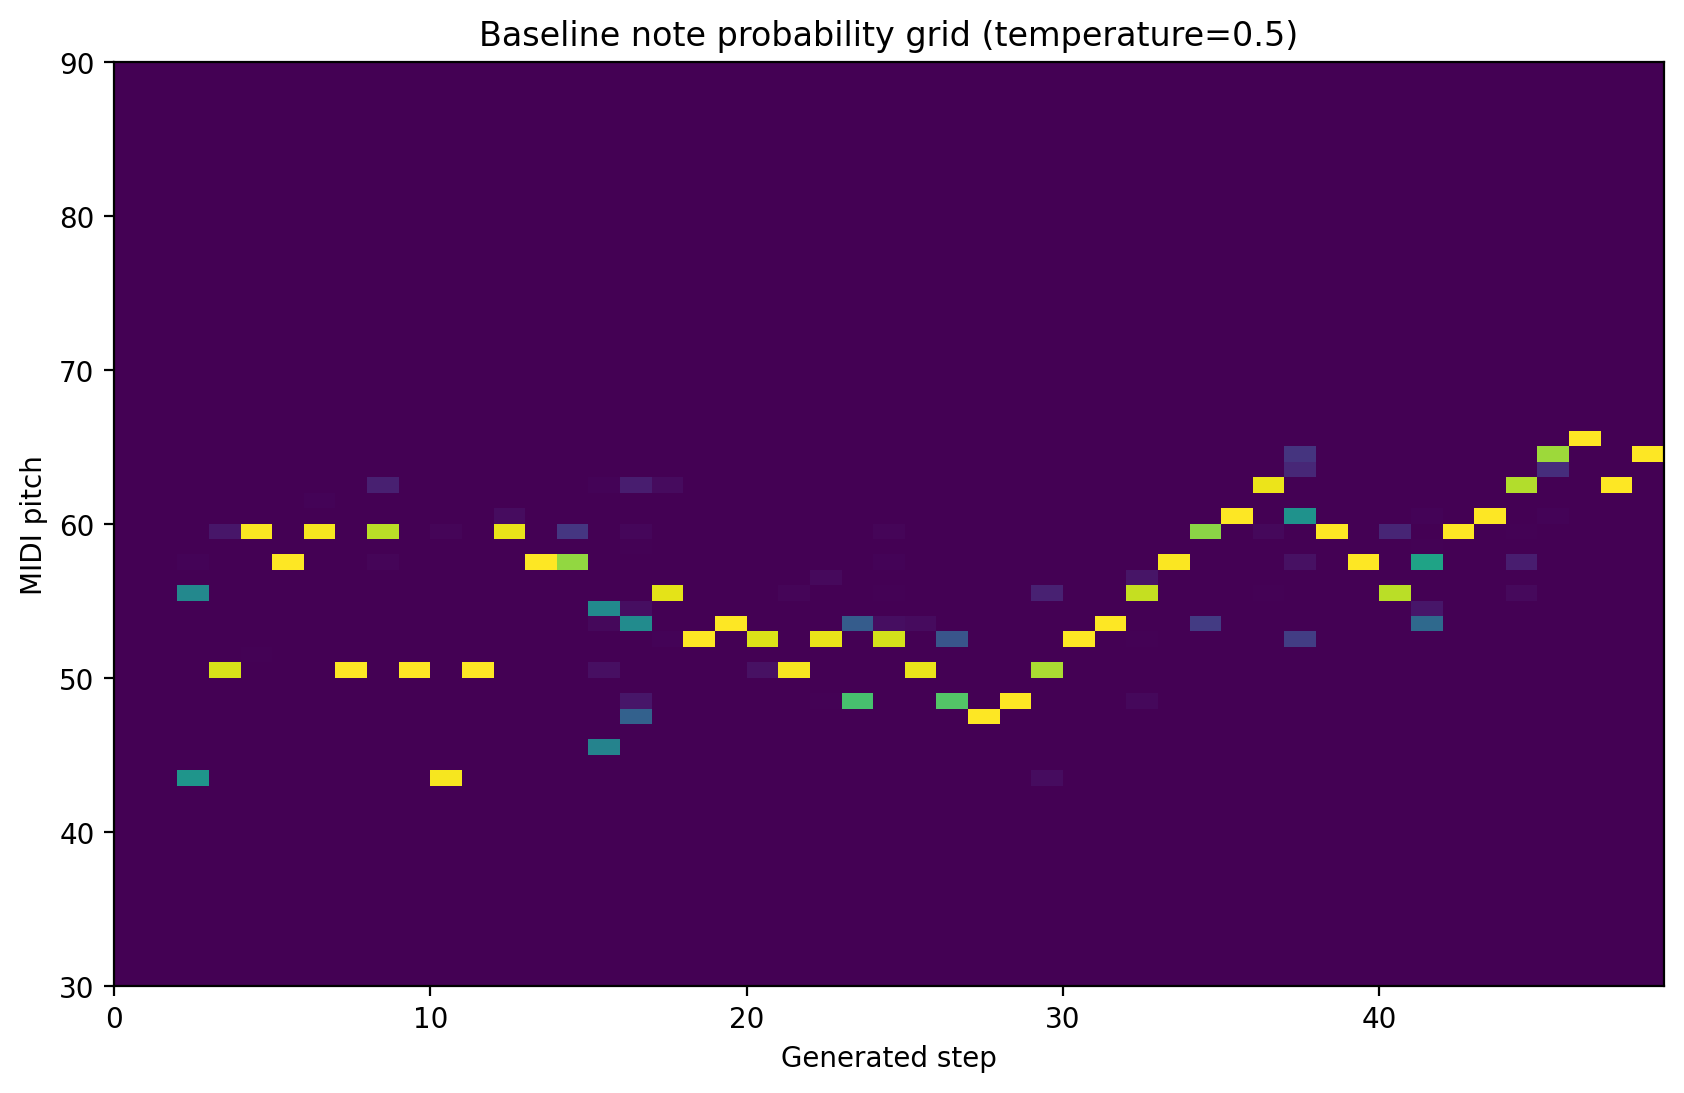

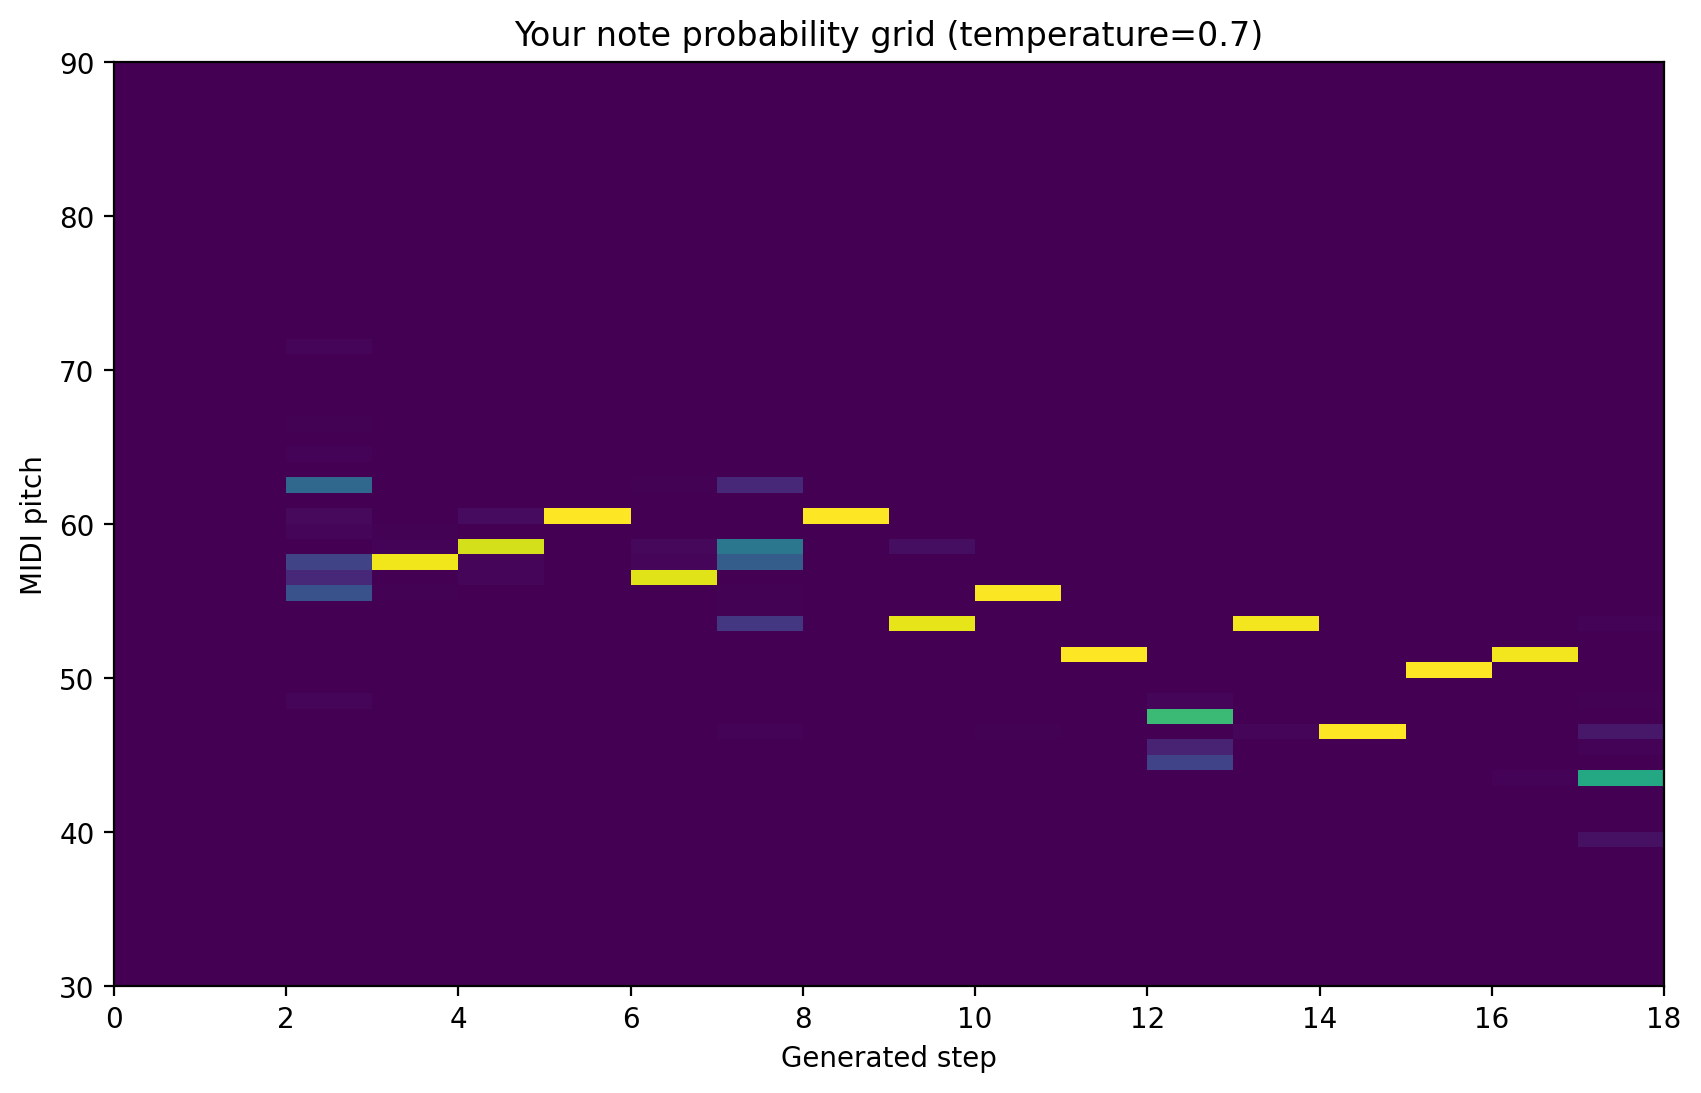

In [23]:
def plot_probability_grid(info, notes_vocab, title):
    max_pitch = 90
    seq_len = len(info)
    grid = np.zeros((max_pitch, seq_len), dtype=np.float32)

    for j in range(seq_len):
        for i, prob in enumerate(info[j]["note_probs"]):
            try:
                pitch = music21.note.Note(notes_vocab[i]).pitch.midi
                if pitch < max_pitch:
                    grid[pitch, j] = prob
            except:
                pass

    plt.figure(figsize=(10, 6))
    plt.imshow(grid[30:90, :], origin="lower", aspect="auto", extent=[0, seq_len, 30, 90])
    plt.title(title)
    plt.xlabel("Generated step")
    plt.ylabel("MIDI pitch")
    plt.show()

plot_probability_grid(info_baseline, notes_vocab, "Baseline note probability grid (temperature=0.5)")
plot_probability_grid(info_yours, notes_vocab, "Your note probability grid (temperature=0.7)")